In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.5.0'

In [4]:
img_generator = tf.keras.preprocessing.image.ImageDataGenerator(#rotation_range=90,
                                                                brightness_range=(0.5,1),
                                                                #shear_range=0.2,
                                                                #zoom_range=0.2,
                                                                channel_shift_range=0.2,
                                                                horizontal_flip=True,
                                                                vertical_flip=True,
                                                                rescale=1./255,
                                                                validation_split=0.3)

In [8]:
root_dir = '101_ObjectCategories'
img_generator_flow_train = img_generator.flow_from_directory(
    directory=root_dir,
    target_size=(224, 224),
    batch_size=32,
    shuffle=True,
    subset="training")

img_generator_flow_valid = img_generator.flow_from_directory(
    directory=root_dir,
    target_size=(224, 224),
    batch_size=32,
    shuffle=True,
    subset="validation")

Found 6444 images belonging to 102 classes.
Found 2700 images belonging to 102 classes.


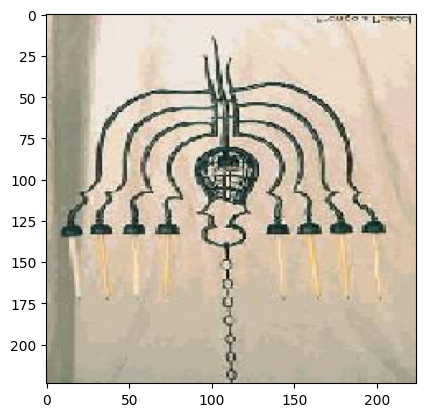

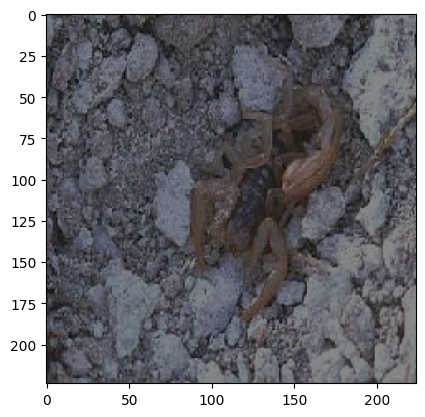

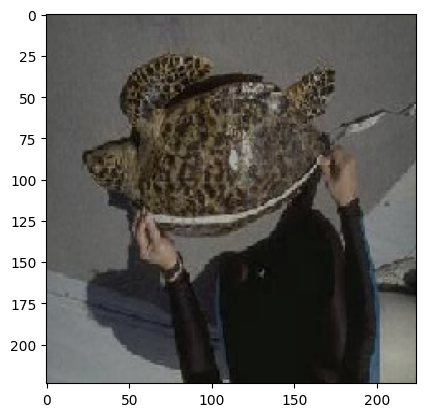

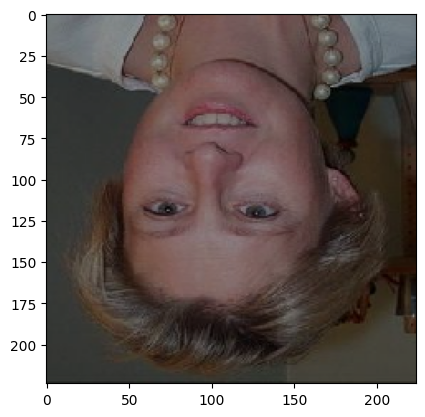

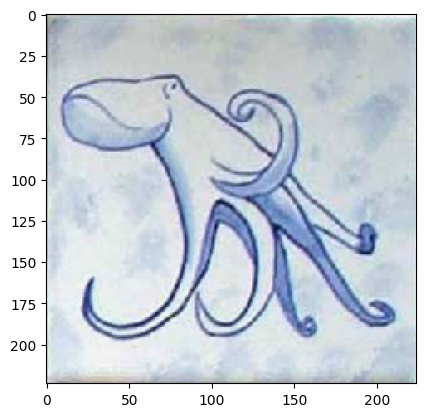

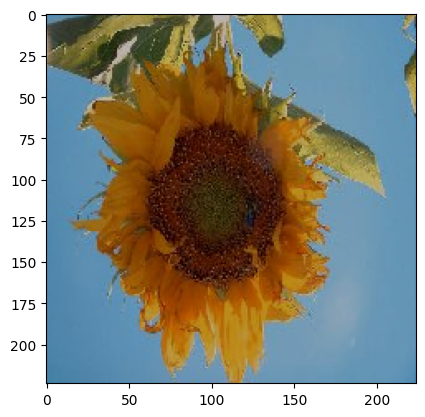

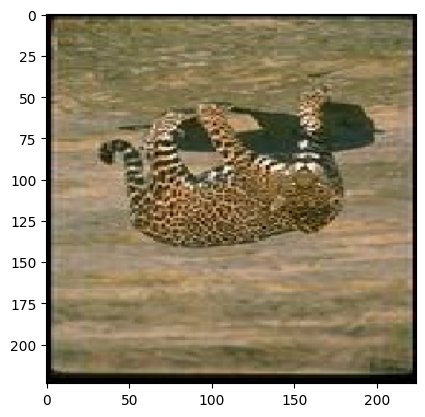

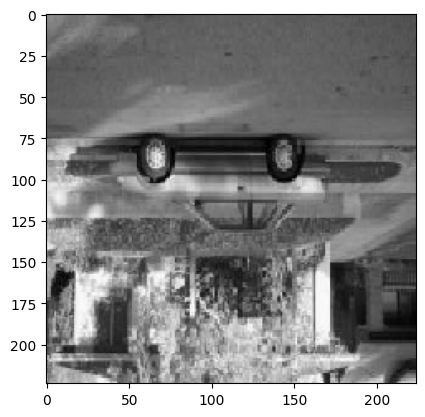

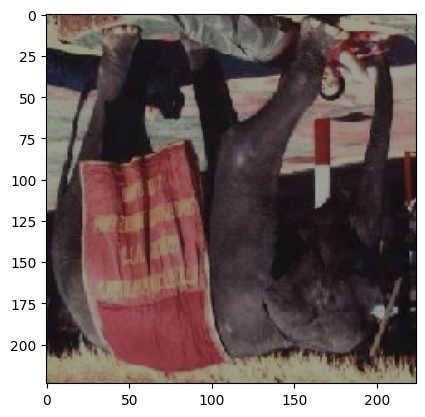

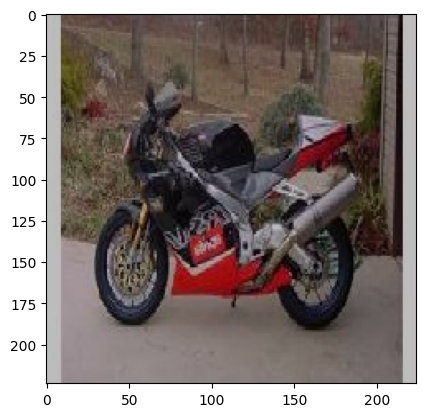

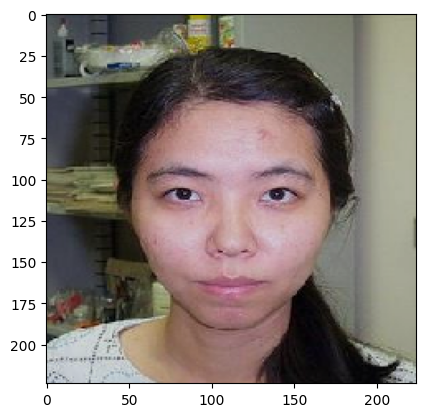

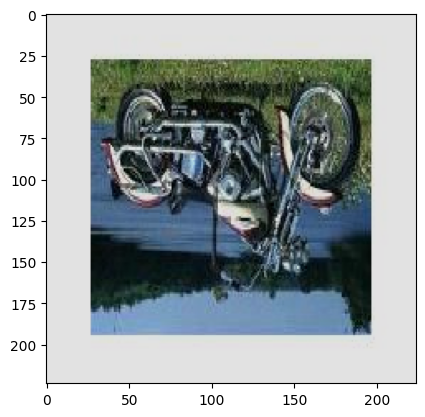

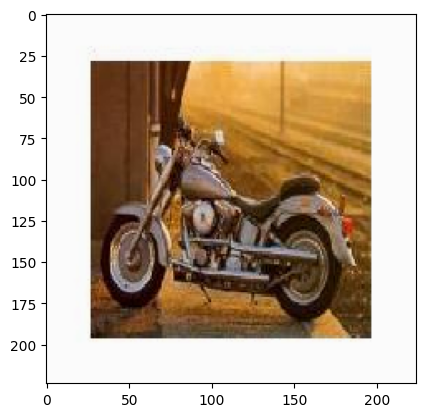

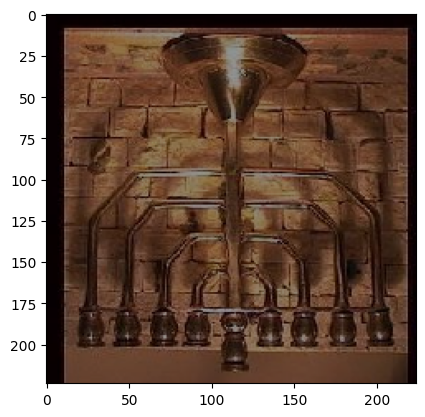

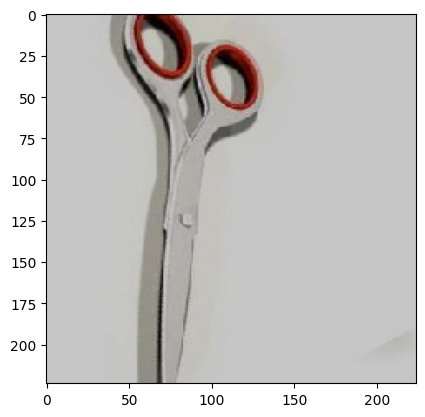

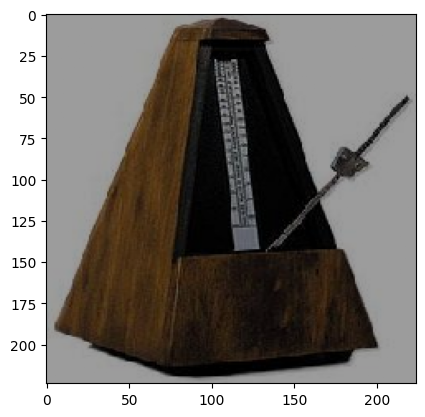

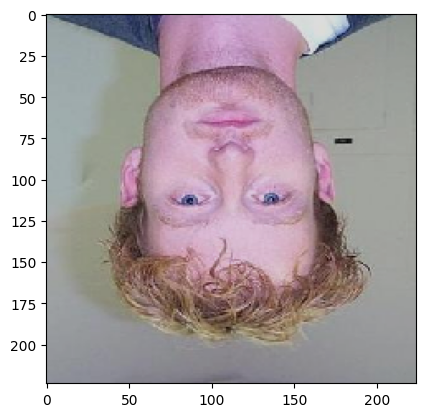

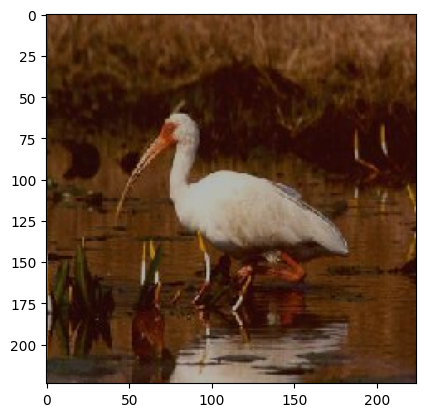

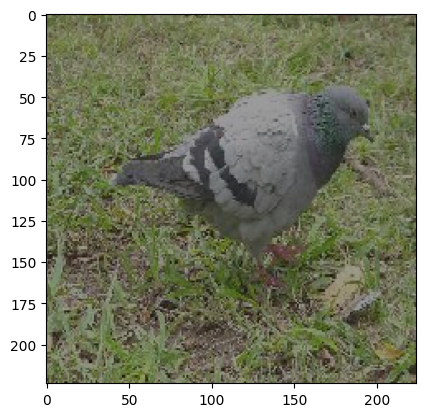

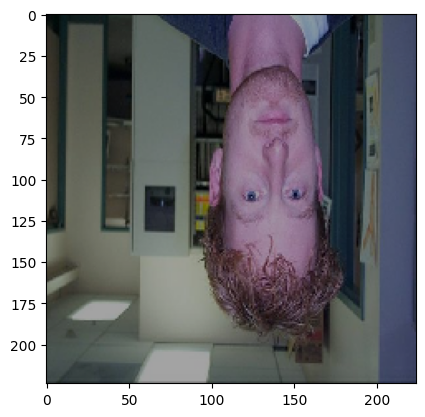

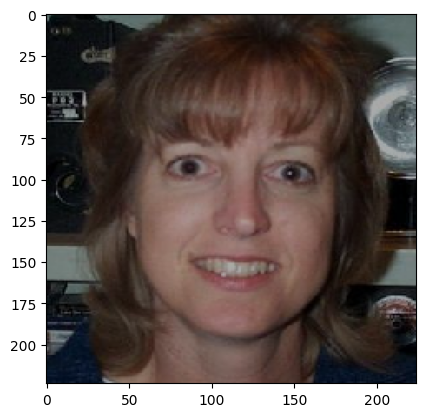

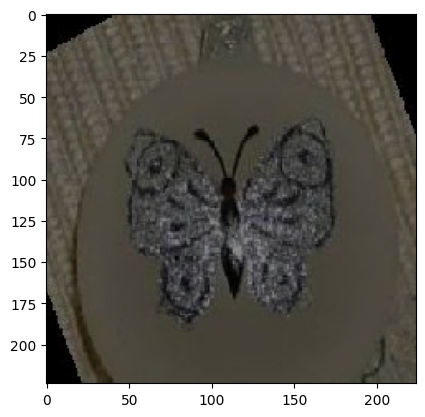

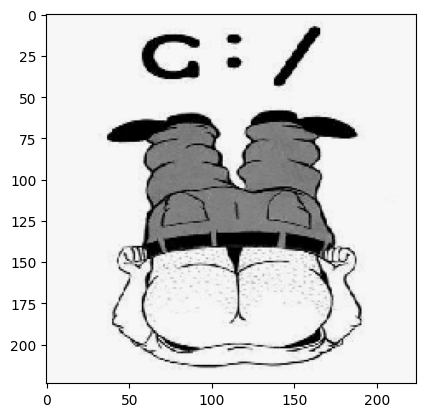

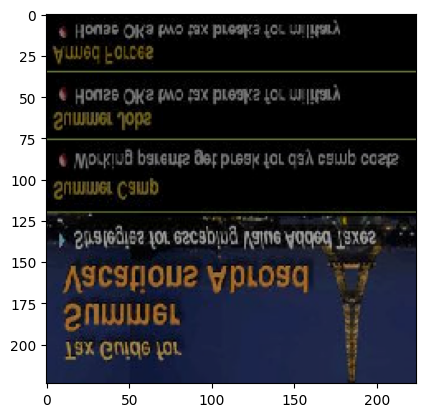

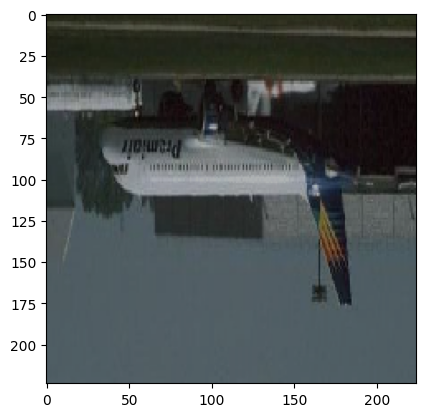

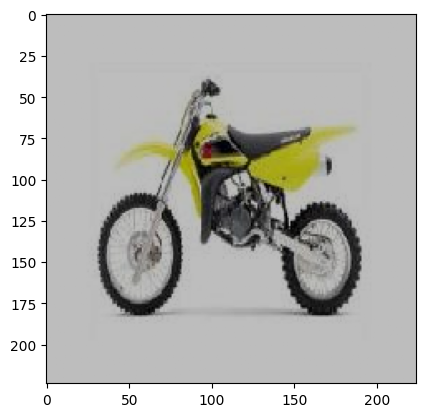

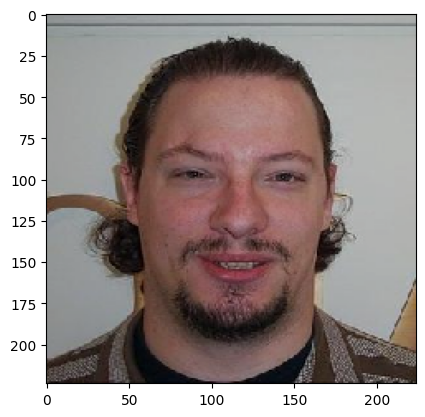

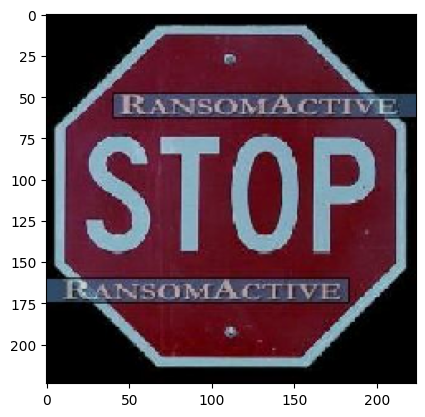

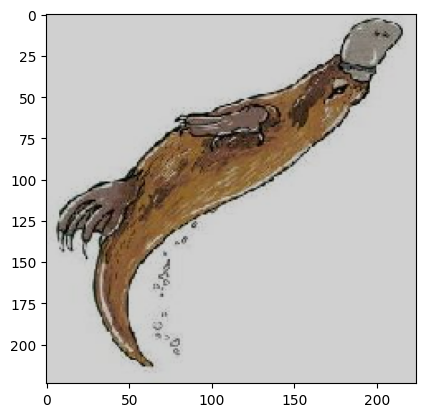

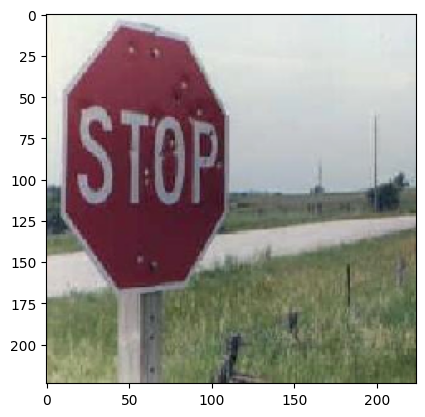

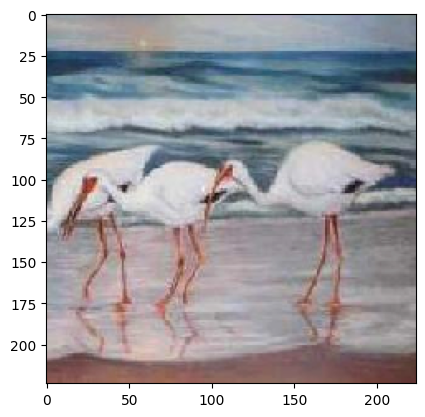

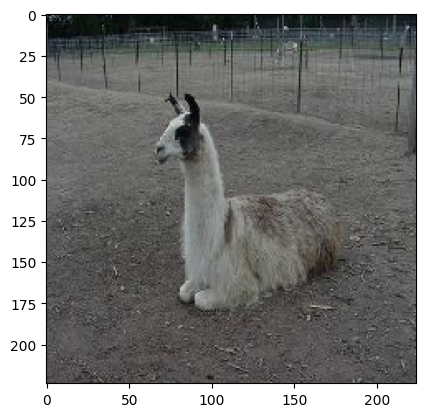

In [9]:
imgs, labels = next(iter(img_generator_flow_train))
for img, label in zip(imgs, labels):
    plt.imshow(img)
    plt.show()

#### a. Load in a pretrained model (InceptionV3)

In [11]:
base_model = tf.keras.applications.InceptionV3(input_shape=(224,224,3),
                                               include_top=False,
                                               weights = "imagenet"
                                               )

#### b. Freeze parameters (weights) in model’s lower convolutional layers

In [12]:
base_model.trainable = False

####  c. Add custom classifier with several layers of trainable parameters to model

In [13]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(102, activation="softmax")
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 2, 2, 2048)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 102)               835686    
Total params: 22,638,470
Trainable params: 835,686
Non-trainable params: 21,802,784
_________________________________________________________________


#### d. Train classifier layers on training data available for task

In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = [tf.keras.metrics.CategoricalAccuracy()])

In [21]:
# After training the model
test_loss, test_categorical_accuracy = model.evaluate(x_test, y_test)

print("Test Categorical Accuracy:", test_categorical_accuracy)


NameError: name 'x_test' is not defined

In [16]:
model.fit(img_generator_flow_train, validation_data=img_generator_flow_valid, steps_per_epoch=20, epochs=50) #20,50

Epoch 1/50
20/20 [==============================] - 165s 8s/step - loss: 11.0747 - categorical_accuracy: 0.2016 - val_loss: 5.7036 - val_categorical_accuracy: 0.4078
Epoch 2/50
20/20 [==============================] - 122s 6s/step - loss: 4.3968 - categorical_accuracy: 0.4774 - val_loss: 2.9513 - val_categorical_accuracy: 0.5715
Epoch 3/50
20/20 [==============================] - 123s 6s/step - loss: 2.3514 - categorical_accuracy: 0.6578 - val_loss: 2.4930 - val_categorical_accuracy: 0.6493
Epoch 4/50
20/20 [==============================] - 128s 7s/step - loss: 2.1275 - categorical_accuracy: 0.7141 - val_loss: 1.9382 - val_categorical_accuracy: 0.6744
Epoch 5/50
20/20 [==============================] - 131s 7s/step - loss: 1.8367 - categorical_accuracy: 0.7656 - val_loss: 2.2185 - val_categorical_accuracy: 0.6807
Epoch 6/50
20/20 [==============================] - 131s 7s/step - loss: 1.5604 - categorical_accuracy: 0.7500 - val_loss: 1.9134 - val_categorical_accuracy: 0.7059
Epoch 7/5

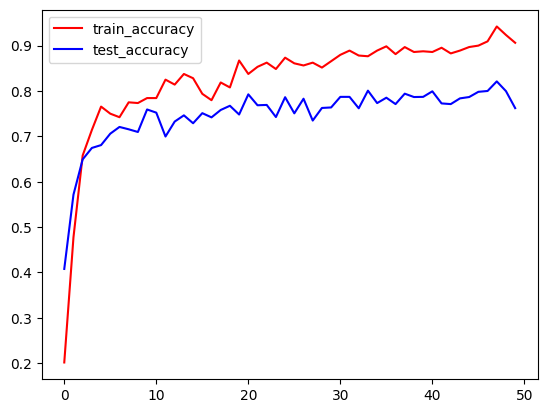

In [20]:
# Visualise train / Valid Accuracy
plt.plot(model.history.history["categorical_accuracy"], c="r", label="train_accuracy")
plt.plot(model.history.history["val_categorical_accuracy"], c="b", label="test_accuracy")
plt.legend(loc="upper left")
plt.show()

#### e. Fine-tune hyper parameters and unfreeze more layers as needed

In [22]:
base_model.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = [tf.keras.metrics.CategoricalAccuracy()])

In [23]:
model.fit(img_generator_flow_train, validation_data=img_generator_flow_valid, steps_per_epoch=10, epochs=10) #20,50

Epoch 1/10
10/10 [==============================] - 248s 22s/step - loss: 3.8212 - categorical_accuracy: 0.5063 - val_loss: 65.0749 - val_categorical_accuracy: 0.0874
Epoch 2/10
10/10 [==============================] - 249s 26s/step - loss: 3.4840 - categorical_accuracy: 0.3781 - val_loss: 1187.9104 - val_categorical_accuracy: 0.0230
Epoch 3/10
10/10 [==============================] - 236s 25s/step - loss: 4.2509 - categorical_accuracy: 0.3187 - val_loss: 43506.6758 - val_categorical_accuracy: 0.0067
Epoch 4/10
10/10 [==============================] - 219s 23s/step - loss: 3.1602 - categorical_accuracy: 0.3781 - val_loss: 8677.8301 - val_categorical_accuracy: 0.0674
Epoch 5/10
10/10 [==============================] - 214s 23s/step - loss: 2.7002 - categorical_accuracy: 0.4344 - val_loss: 321.0748 - val_categorical_accuracy: 0.0822
Epoch 6/10
10/10 [==============================] - 211s 22s/step - loss: 2.5003 - categorical_accuracy: 0.4719 - val_loss: 24107.0488 - val_categorical_accu

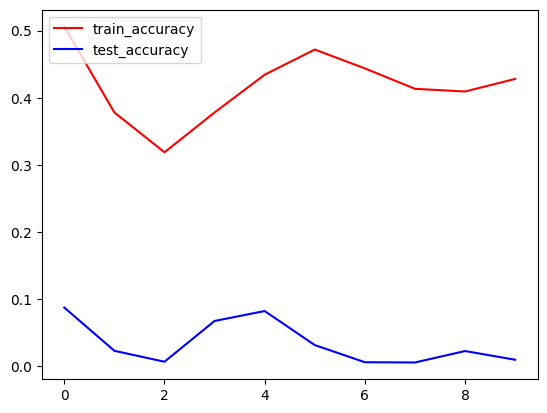

In [24]:
# Visualise train / Valid Accuracy
plt.plot(model.history.history["categorical_accuracy"], c="r", label="train_accuracy")
plt.plot(model.history.history["val_categorical_accuracy"], c="b", label="test_accuracy")
plt.legend(loc="upper left")
plt.show()